Welcome to assignment 1.                                                       

We are using pathology images for our first assignment please download data from this link https://drive.google.com/drive/folders/10dUOzcPR-PQwfFYcHk5gsLjIjSorQ32Q?usp=sharing



Task 1: Feature Generation (15%)
Use and run the following code (a deep network) to generate features from a set of training images. For this assignment, you do not need to know how the deep network is working here to extract features.
This code extracts the features of image T4.tif (in the T folder of dataset). Modify the code so that it iterates over all images of the dataset and extracts their features.
Allocate 10% of the data for validation.

Insert your code here for Task 1





In [ ]:
# import the necessary packages

import torch
import numpy as np
import torchvision.transforms as transforms
from torchvision.models import densenet121
from torch.autograd import Variable
from PIL import Image
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import os

# imports for task 2
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [ ]:
# Load the DenseNet model pre-trained on ImageNet
model = densenet121(pretrained=True)
# Modify the model to remove the last fully connected layer
model = torch.nn.Sequential(*list(model.children())[:-1])
# Add a global average pooling layer to the model
model.add_module("global_avg_pool", torch.nn.AdaptiveAvgPool2d(1))
# Set the model to evaluation mode
model.eval()

# Define a series of transformations for preprocessing the images
preprocess = transforms.Compose(
    [
        transforms.Resize(256),  # Resize the input images to 256x256
        transforms.CenterCrop(224),  # Crop the images to 224x224
        transforms.ToTensor(),  # Convert the images to PyTorch tensors
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
        ),  # Normalize the images
    ]
)

# Specify the directory containing the dataset
dataset_dir = "train"

# Initialize lists to hold image paths and their corresponding labels
image_paths = []
labels = []

# Iterate through each folder in the dataset directory
for folder_name in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder_name)
    # Check if the path is a directory
    if os.path.isdir(folder_path):
        # Iterate through each file in the folder
        for file_name in os.listdir(folder_path):
            # Check if the file is a TIFF image
            if file_name.endswith(".tif"):
                # Append the image path and label to their respective lists
                image_paths.append(os.path.join(folder_path, file_name))
                labels.append(folder_name)

# Convert categorical labels into numeric labels
unique_labels = sorted(set(labels))
label_to_numeric = {label: idx for idx, label in enumerate(unique_labels)}
labels_numeric = [label_to_numeric[label] for label in labels]

# Combine image paths and numeric labels into tuples for easy processing
combined = list(zip(image_paths, labels_numeric))

# Split the combined dataset into training/validation and testing sets
train_test_combined, val_combined = train_test_split(
    combined, test_size=0.1, random_state=42
)

# Further split the training/validation set into separate training and validation sets
train_combined, test_combined = train_test_split(
    train_val_combined, test_size=0.1, random_state=42
)


def extract_features_and_labels(combined_data):
    """
    Extract features and labels from the given dataset.

    Parameters:
    - combined_data: A list of tuples, each containing the path to an image and its numeric label.

    Returns:
    - A tuple containing two numpy arrays: one for the extracted features and one for the corresponding labels.
    """
    features = []
    labels = []
    for path, label in combined_data:
        # Load the image from the specified path
        image = Image.open(path)
        # Preprocess the image
        input_tensor = preprocess(image)
        input_batch = input_tensor.unsqueeze(0)
        # Extract features using the model
        with torch.no_grad():
            output = model(input_batch)
        features.append(output.squeeze().detach().numpy())
        labels.append(label)
    return np.array(features), np.array(labels)


# Extract features and labels for training, testing, and validation sets
train_features, train_labels = extract_features_and_labels(train_combined)
test_features, test_labels = extract_features_and_labels(test_combined)
val_features, val_labels = extract_features_and_labels(val_combined)

# Save the extracted features and labels to disk
np.save("train_features.npy", train_features)
np.save("test_features.npy", test_features)
np.save("val_features.npy", val_features)
np.save("train_labels.npy", train_labels)
np.save("test_labels.npy", test_labels)
np.save("val_labels.npy", val_labels)

print("Features and labels for training, testing, and validation sets have been saved.")

# Note on fixing potential warning with updated model loading approach:
# Uncomment and use the following code to address deprecation warnings related to loading pretrained models:
# from torchvision.models import densenet121, DenseNet121_Weights
# model_weights = DenseNet121_Weights.IMAGENET1K_V1  # Alternatively, use DenseNet121_Weights.DEFAULT for the latest weights
# model = densenet121(weights=model_weights)
# Modify the model similarly as above to prepare for feature extraction
# model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 42.6MB/s]


FileNotFoundError: [Errno 2] No such file or directory: 'train'

 Task 2: High Bias Classification Method (5%)
 Choose a classification method and let is have a high bias.
 Train it on the generated features and discuss why it is underfitting.

 Insert your code here for Task 2




In [ ]:
# Use a multi-class SVM method to classify data
hb_svm_model = svm.SVC(kernel="linear", C=0.00001, gamma=10000)
hb_svm_model.fit(train_features,train_labels)
hb_svm_train_score = hb_svm_model.score(train_features, train_labels, sample_weight=None)
hb_svm_val_score = hb_svm_model.score(val_features, val_labels, sample_weight=None)

print(hb_svm_train_score,hb_svm_val_score)

Logistic Regression Fold 1 Accuracy: 1.0
Logistic Regression Fold 2 Accuracy: 0.9523809523809523
Logistic Regression Fold 3 Accuracy: 0.9841269841269841
Logistic Regression Fold 4 Accuracy: 0.9523809523809523
Logistic Regression Fold 5 Accuracy: 0.9841269841269841
Logistic Regression Fold 6 Accuracy: 0.9841269841269841
Logistic Regression Fold 7 Accuracy: 0.9682539682539683
Logistic Regression Fold 8 Accuracy: 0.9841269841269841
Logistic Regression Fold 9 Accuracy: 0.9523809523809523
Logistic Regression Fold 10 Accuracy: 1.0
Mean Logistic Regression Accuracy: 0.976190476190476
SVM Fold 1 Accuracy: 0.96875
SVM Fold 2 Accuracy: 0.9682539682539683
SVM Fold 3 Accuracy: 0.9841269841269841
SVM Fold 4 Accuracy: 0.9206349206349206
SVM Fold 5 Accuracy: 0.9841269841269841
SVM Fold 6 Accuracy: 0.9682539682539683
SVM Fold 7 Accuracy: 0.9682539682539683
SVM Fold 8 Accuracy: 0.9682539682539683
SVM Fold 9 Accuracy: 0.9682539682539683
SVM Fold 10 Accuracy: 0.9682539682539683
Mean SVM Accuracy: 0.96671

 Task 3: High Variance Classification Method (5%)
 Use the chosen classification method and let it have a high variance.
 Train it on the generated features and discuss why it is overfitting.

 Insert your code here for Task 3




In [ ]:
# Use a multi-class SVM method to classify data
hv_svm_model = svm.SVC(kernel='sigmoid')
hv_svm_scores = cross_val_score(hv_svm_model, train_features, train_labels, cv=k)

# Print the cross-validation scores
for i, hv_score in enumerate(hv_svm_scores):
    print(f"SVM Fold {i+1} Accuracy: {hv_score}")

# Calculate and print the mean accuracy across all folds
hv_mean_accuracy = np.mean(hv_svm_scores)
print(f"Mean SVM Accuracy: {hv_mean_accuracy}")

# Calculate and print the accuracy variance across all folds
hv_accuracy_var = np.var(hv_svm_scores)
print(f"SVM Accuracy Variance: {hv_accuracy_var}")

SVM Fold 1 Accuracy: 0.890625
SVM Fold 2 Accuracy: 0.8888888888888888
SVM Fold 3 Accuracy: 0.9047619047619048
SVM Fold 4 Accuracy: 0.8412698412698413
SVM Fold 5 Accuracy: 0.8888888888888888
SVM Fold 6 Accuracy: 0.9206349206349206
SVM Fold 7 Accuracy: 0.9047619047619048
SVM Fold 8 Accuracy: 0.8888888888888888
SVM Fold 9 Accuracy: 0.873015873015873
SVM Fold 10 Accuracy: 0.9047619047619048
Mean SVM Accuracy: 0.8906498015873016
SVM Accuracy Variance: 0.0004255200705861044


 Task 4: Balanced Classification Method (15%)
 Use the chosen classification method and let it balance the bias and variance.
 Train it on the generated features, possibly adjusting parameters.
 Discuss insights into achieving balance.

 Insert your code here for Task 4




In [ ]:
balanced_svm_model = svm.SVC(kernel='linear')
balanced_svm_scores = cross_val_score(balanced_svm_model, train_features,
                                      train_labels, cv=k)

# Print the cross-validation scores
for i, balanced_score in enumerate(balanced_svm_scores):
    print(f"SVM Fold {i+1} Accuracy: {balanced_score}")

# Calculate and print the mean accuracy across all folds
balanced_mean_accuracy = np.mean(balanced_svm_scores)
print(f"Balanced SVM Mean Accuracy: {balanced_mean_accuracy}")

# Calculate and print the accuracy variance across all folds
balanced_accuracy_var = np.var(balanced_svm_scores)
print(f"Balanced SVM Accuracy Variance: {balanced_accuracy_var}")

SVM Fold 1 Accuracy: 0.96875
SVM Fold 2 Accuracy: 0.9682539682539683
SVM Fold 3 Accuracy: 0.9841269841269841
SVM Fold 4 Accuracy: 0.9206349206349206
SVM Fold 5 Accuracy: 0.9841269841269841
SVM Fold 6 Accuracy: 0.9523809523809523
SVM Fold 7 Accuracy: 0.9682539682539683
SVM Fold 8 Accuracy: 0.9682539682539683
SVM Fold 9 Accuracy: 0.9682539682539683
SVM Fold 10 Accuracy: 0.9682539682539683
Balanced SVM Mean Accuracy: 0.9651289682539682
Balanced SVM Accuracy Variance: 0.00029260213923532394


 Task 5: K-Means Clustering (20%)
 Apply K-Means clustering on the generated features.
 Test with available labels and report accuracy.
 Experiment with automated K and compare with manually set 20 clusters.

 Insert your code here for Task 5




c:\Users\marsh\anaconda3\envs\SYDE522\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\marsh\anaconda3\envs\SYDE522\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\marsh\anaconda3\envs\SYDE522\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\marsh\anaconda3\envs\SYDE522\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans i

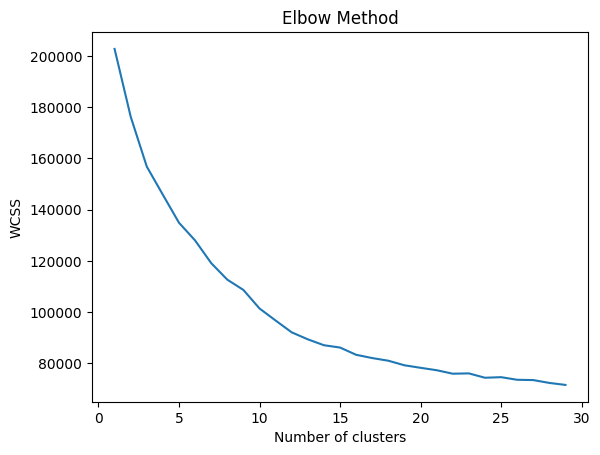

Optimal number of clusters (k_optimal): 2
Cluster assignments with optimal clusters: [1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1
 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1
 1 1 1 0 1 1 0 

c:\Users\marsh\anaconda3\envs\SYDE522\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\marsh\anaconda3\envs\SYDE522\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [ ]:
# Assuming 'train_features' are the features extracted from the images

# Apply K-Means with manually set 20 clusters
kmeans_20 = KMeans(n_clusters=20, random_state=42)
clusters_20 = kmeans_20.fit_predict(train_features)

# Since KMeans does not inherently provide labels matching to original labels,
# a mapping function or strategy is needed to evaluate clustering accuracy.

# Apply K-Means with automated K (e.g., using the Elbow method or other heuristic)
# This step would involve determining the optimal number of clusters K,
# which can be done using methods like the Elbow Method or the Silhouette Score.

# Example for Elbow Method (commented out because it requires plotting)


wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(train_features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")  # Within cluster sum of squares
plt.show()
# Determine the elbow point in the WCSS
diffs = np.diff(wcss)
k_optimal = (
    np.argmin(diffs) + 2
)  # +2 because the first cluster number is 2 (index starts from 0)
# Assuming optimal K is found, e.g., k_optimal
kmeans_opt = KMeans(n_clusters=k_optimal, random_state=42)
clusters_opt = kmeans_opt.fit_predict(train_features)
print("Optimal number of clusters (k_optimal):", k_optimal)
print("Cluster assignments with optimal clusters:", clusters_opt)
# Accuracy reporti#ng would require a strategy to match cluster labels to true labels, which is non-trivial
# because clustering is unsupervised and does not directly produce class labels that match with the ground truth.

 Task 6: Additional Clustering Algorithm (10%)
 Choose another clustering algorithm and apply it on the features.
 Test accuracy with available labels.

 Insert your code here for Task 6




In [ ]:


# Assuming 'train_features' are the features extracted from the images

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(train_features)

# The silhouette score can be used to evaluate the quality of the clustering
silhouette_avg = silhouette_score(train_features, dbscan_clusters)
print(f"Silhouette Score: {silhouette_avg}")

# DBSCAN labels outliers as -1, so you might want to handle them in your accuracy assessment


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

 Task 7: PCA for Classification Improvement (20%)
 Apply PCA on the features and then feed them to the best classification method in the above tasks.
 Assess if PCA improves outcomes and discuss the results.

 Insert your code here for Task 7




In [ ]:
Data_To_PCA = [[placeholder]]

# project from X to K dimensions using PCA
k = 2

# using sklearn's implementation
pca = PCA(k)
projected_sklearn = pca.fit_transform(Data_To_PCA.data)
print('reduced dim (sklearn):', projected_sklearn.shape)
plt.figure(1,figsize = (12,4))

plt.scatter(projected_sklearn[:, 0], projected_sklearn[:, 1],
            c=Data_To_PCA.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab20', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('Dim reduction using PCA (sklearn)')
plt.colorbar()


[[RUN BEST OTHER MODEL]]

 Task 8: Visualization and Analysis (10%)
 Plot the features in a lower dimension using dimentinality reduction techniques.
 Analyze the visual representation, identifying patterns or insights.

Insert your code here for Task 8

In [ ]:
import umap
Data_To_Reduce = [[placeholder]]
Labels_For_Reduction = [[placeholder]]
mapper = umap.UMAP().fit(Data_To_Reduce)
umap.plot.points(mapper,labels=Labels_For_Reduction,theme='fire')


umap.plot.output_notebook()
hover_data = pd.DataFrame({'index':np.arange(30000),
                           'label':Labels_For_Reduction})
hover_data['item'] = hover_data.label.map(
    {
        '0':'Name1',
        '1':'Name1',
        '2':'Name1',
        '3':'Name1',
        '4':'Name1',
        '5':'Name1',
        '6':'Name1',
        '7':'Name1',
        '8':'Name1',
        '9':'Name1',
    }
)
p = umap.plot.interactive(mapper, labels=Labels_For_Reduction, hover_data=hover_data, point_size=2)
umap.plot.show(p)